In [1]:
import re
import os 
from glob import glob
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import integrate
from scipy.signal import find_peaks
from scipy.fftpack import fft
from scipy import signal, misc
from scipy.ndimage import gaussian_filter1d

In [60]:
#读取单个的PE loop的文件
df = pd.read_csv(r'C:\PhD-Zipeng\Research projects\DABCO\BF4\Impedance\Arrhenius fitting\Cooling\373.22.tab',delimiter='\t',encoding= 'unicode_escape')
df.head(10)

,#4294A_Frequency,E real,Eimaginary
0,1000.000,52.43872,4.336863
1,1013.939,51.72060,5.291248
2,1028.073,51.71726,5.546219
3,1042.404,51.87074,5.206819
4,1056.935,50.56518,5.560027
5,1071.668,51.63305,4.894384
6,1086.606,52.29094,4.844709
7,1101.753,52.56074,4.794347
8,1117.111,51.62384,5.476408
9,1132.683,50.97159,4.684453


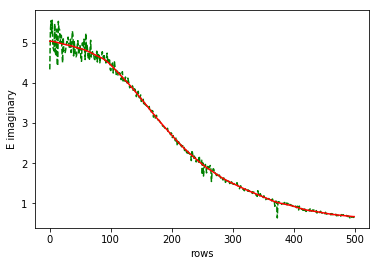

[]


In [61]:
# 提取 E imaginary 的列
E_ima = df['Eimaginary']
# 做smooth，不然 find peak 会很麻烦
E_ima_smooth = gaussian_filter1d(E_ima.iloc[:], 10) #10代表 smooth的强度，最好是能刚好取出杂峰，又不smooth 太重

plt.plot(E_ima,'g--')
plt.plot(E_ima_smooth,'r')
plt.xlabel('rows')
plt.ylabel('E imaginary')
plt.show()

# find peak
indices = find_peaks(E_ima_smooth, prominence=0)[0]# promince 是调节峰的突起程度，我的峰不太突起，所以设为0
print(indices)

In [62]:
indices[0]
#常见的错误在于：某一个文件的峰找不到
#解决方案是该smooth的强度

IndexError: index 0 is out of bounds for axis 0 with size 0

In [56]:
f_relaxation = df.loc[int(indices[0]),'#4294A_Frequency']
print(f_relaxation)
print(type(f_relaxation))

1337.3729999999998
<class 'numpy.float64'>


# Below is the code，above is for breakdown the loop and debug

In [46]:
#从文件名提取温度with regular expression
path = r'C:\PhD-Zipeng\Research projects\DABCO\BF4\Impedance\Arrhenius fitting\Cooling'
files = os.listdir(path)
temperature = list()
for file in files:
    if file.endswith(".tab"):
        num = re.findall(r"\d+.\d+", file)
        temperature.append(float(num[0]))
print(temperature)

[296.94, 296.98, 297.02, 297.08, 297.13, 297.16, 297.2, 297.25, 297.29, 297.34, 297.38, 297.43, 297.48, 297.54, 297.58, 297.63, 297.68, 297.72, 297.78, 297.83, 297.89, 297.94, 297.99, 298.04, 298.1, 298.15, 298.2, 298.26, 298.31, 298.37, 298.43, 298.49, 298.55, 298.6, 298.67, 298.74, 298.79, 298.85, 298.92, 298.98, 299.05, 299.12, 299.18, 299.25, 299.31, 299.38, 299.45, 299.53, 299.59, 299.66, 299.74, 299.82, 299.88, 299.98, 300.06, 300.13, 300.21, 300.29, 300.37, 300.46, 300.54, 300.62, 300.71, 300.8, 300.89, 300.98, 301.07, 301.17, 301.27, 301.35, 301.45, 301.55, 301.64, 301.74, 301.85, 301.94, 302.07, 302.16, 302.27, 302.37, 302.48, 302.61, 302.7, 302.83, 302.91, 303.03, 303.13, 303.25, 303.37, 303.48, 303.57, 303.69, 303.81, 303.91, 304.04, 304.14, 304.26, 304.37, 304.5, 304.62, 304.73, 304.82, 304.94, 305.06, 305.18, 305.29, 305.44, 305.53, 305.65, 305.76, 305.86, 305.99, 306.1, 306.22, 306.33, 306.45, 306.55, 306.66, 306.8, 306.88, 307.01, 307.14, 307.26, 307.35, 307.49, 307.58, 

In [97]:
#批量操作所有文件
path = r'C:\PhD-Zipeng\Research projects\DABCO\BF4\Impedance\Arrhenius fitting\Cooling'

files = glob(path + "/*.tab")

lst_T=list()
lst_f_relax=list()
i = 0


for file in files:
    df = pd.read_csv(file,delimiter='\t',encoding= 'unicode_escape')
    E_ima = df['Eimaginary']
    E_ima_smooth = gaussian_filter1d(E_ima.iloc[:], 7)
    indices = find_peaks(E_ima_smooth, prominence=0)[0]# promince 是调节峰的突起程度，我的峰不太突起，所以设为0
    
    lst_T.append(temperature[i])
#     print(temperature[i]) # 用来debug，如果loop 报错，可以找到是 i=xxx 的时候报错
    
    f_relaxation = df.loc[int(indices[0]),'#4294A_Frequency']
    lst_f_relax.append(f_relaxation)
    i = i+1
    
dic={"T":lst_T,
  "f_relaxation":lst_f_relax}
dt=pd.DataFrame(dic)
dt.head(10)

,T,f_relaxation
0,296.94,1028.073
1,296.98,1013.939
2,297.02,1374.917
3,297.08,1071.668
4,297.13,3883.098
5,297.16,7546.673
6,297.20,1164.481
7,297.25,2863.610
8,297.29,21020.610
9,297.34,10667.340


In [83]:
dt.to_csv(r'C:\PhD-Zipeng\Research projects\DABCO\BF4\Impedance\Arrhenius fitting\f0 vs T Cooling.csv')

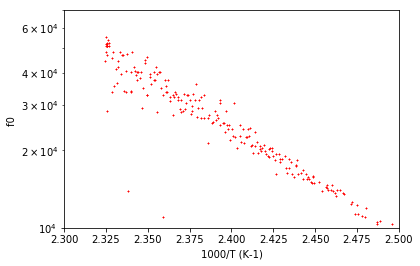

In [98]:
T = dt['T']
one_over_T = 1000/T

plt.plot(one_over_T,dt['f_relaxation'],'r+',linewidth=1, markersize=2)
plt.yscale("log")
plt.xlabel('1000/T (K-1)')
plt.ylabel('f0 ')
plt.xlim((2.3,2.5))
plt.ylim((10000,70000))
plt.show()